In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris, make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [3]:
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [4]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(iris_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [5]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [6]:
iris_df['target']=iris.target
iris_df['cluster'] = kmeans.labels_
iris_result = iris_df.groupby(['target', 'cluster'])['sepal_length'].count()
iris_result

target  cluster
0       1          50
1       0           2
        2          48
2       0          36
        2          14
Name: sepal_length, dtype: int64

In [7]:
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1


In [8]:
pca = PCA(n_components=2)

In [9]:
pca_transformed = pca.fit_transform(iris.data)

iris_df['pca_x'] = pca_transformed[:,0]
iris_df['pca_y'] = pca_transformed[:,1]
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


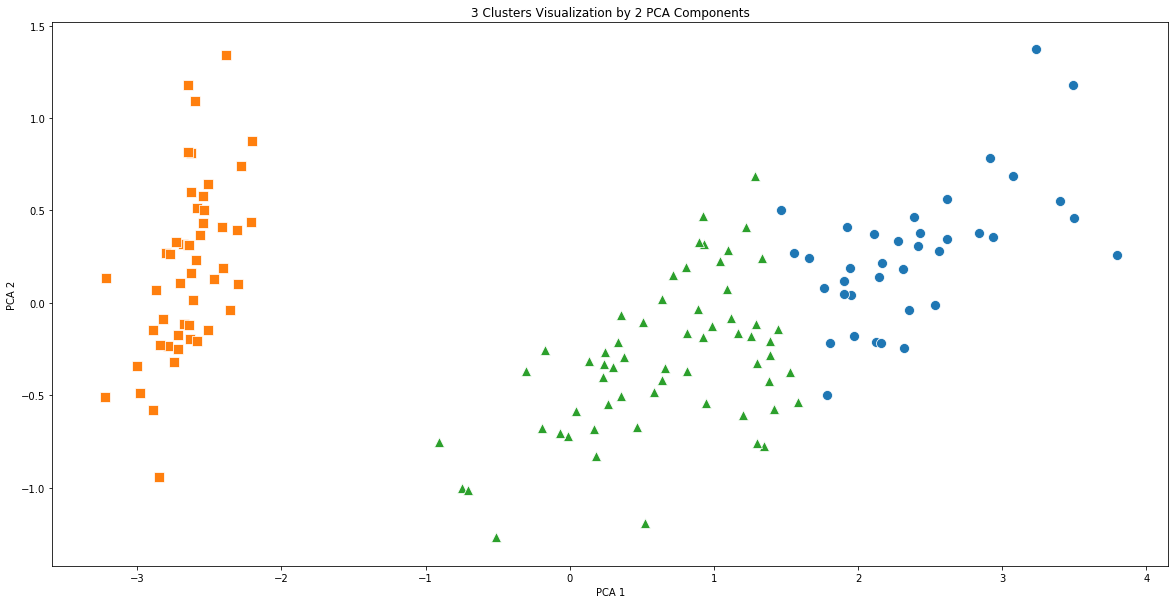

In [10]:
marker0_ind = iris_df[iris_df['cluster']==0].index
marker1_ind = iris_df[iris_df['cluster']==1].index
marker2_ind = iris_df[iris_df['cluster']==2].index

plt.figure(figsize=(20, 10))
sns.scatterplot(x=iris_df.loc[marker0_ind, 'pca_x'], y=iris_df.loc[marker0_ind, 'pca_y'], marker='o', s=100)
sns.scatterplot(x=iris_df.loc[marker1_ind, 'pca_x'], y=iris_df.loc[marker1_ind, 'pca_y'], marker='s', s=100)
sns.scatterplot(x=iris_df.loc[marker2_ind, 'pca_x'], y=iris_df.loc[marker2_ind, 'pca_y'], marker='^', s=100)

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

### Clustering 알고리즘 테스트를 위한 데이터 생성

In [26]:
x, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(x.shape, y.shape)

unique, counts =np.unique(y, return_counts=True)
print(unique, counts)

(200, 2) (200,)
[0 1 2] [67 67 66]


In [27]:
cluster_df = pd.DataFrame(x, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y
cluster_df.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


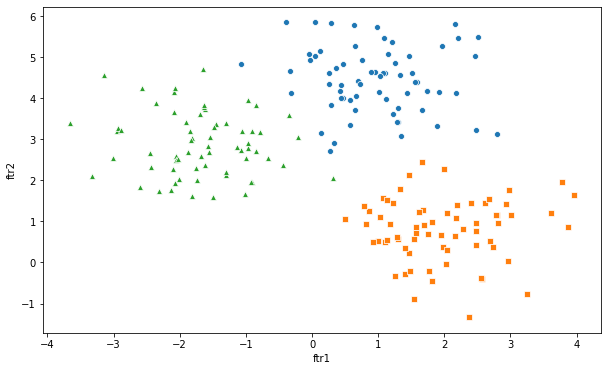

In [42]:
target_list = np.unique(y)

markers=['o', 's','^','P','D','H','x']

plt.figure(figsize=(10, 6))
for target in target_list:
    target_cluster =cluster_df[cluster_df['target'] == target]
    sns.scatterplot(x=target_cluster['ftr1'], y= target_cluster['ftr2'], edgecolors='k', marker=markers[target])
#     plt.scatter(x=target_cluster['ftr1'], y= target_cluster['ftr2'], edgecolors='k', marker=markers[target])
plt.show()

In [29]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(x)
cluster_df['kmeans_label'] = cluster_labels

In [30]:
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

In [31]:
cluster_df

,ftr1,ftr2,target,kmeans_label
0,-1.692427,3.622025,2,2
1,0.697940,4.428867,0,0
2,1.100228,4.606317,0,0
3,-1.448724,3.384245,2,2
4,1.214861,5.364896,0,0
...,...,...,...,...
195,2.956576,0.033718,1,1
196,-2.074113,4.245523,2,2
197,2.783411,1.151438,1,1
198,1.226724,3.620511,0,0


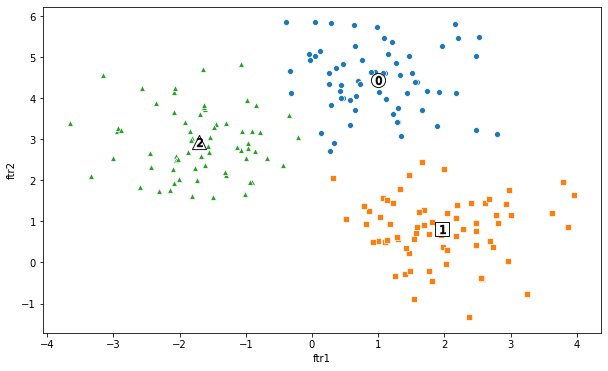

In [45]:
markers=['o', 's','^','P','D','H','x']
plt.figure(figsize=(10, 6))

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label']==label]
    center_x_y = centers[label]
    sns.scatterplot(x=label_cluster['ftr1'], y= label_cluster['ftr2'], edgecolors='k', marker=markers[label])
#     plt.scatter(x=label_cluster['ftr1'], y= label_cluster['ftr2'], edgecolors='k', marker=markers[label])
    
    
    plt.scatter(x=center_x_y[0], y= center_x_y[1], s=200, color='white', alpha=0.9, edgecolors='k', marker=markers[label])    
    plt.scatter(x=center_x_y[0], y= center_x_y[1], s=70, color='k', alpha=0.9, edgecolors='k', marker='$%d$' % label)    

plt.show()


In [33]:
cluster_df.groupby('target')['kmeans_label'].value_counts()

target  kmeans_label
0       0               66
        2                1
1       1               67
2       2               65
        1                1
Name: kmeans_label, dtype: int64

In [46]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [47]:
iris = load_iris()
feature_names= ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [53]:
irisDF = pd.DataFrame(iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++',max_iter=300,random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

In [54]:
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return value''s shape',score_samples.shape)

silhouette_samples() return values shape (150,)


In [55]:
irisDF['silhouette_coeff'] = score_samples

In [56]:
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('Iris data set Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

Iris data set Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [57]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.451105
1    0.798140
2    0.417320
Name: silhouette_coeff, dtype: float64

In [58]:
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

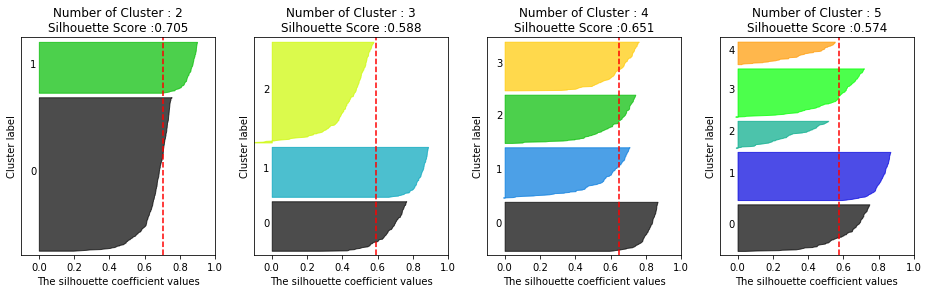

In [60]:
x, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, \
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)  

# cluster 개수를 2개, 3개, 4개, 5개 일때의 클러스터별 실루엣 계수 평균값을 시각화 
visualize_silhouette([ 2, 3, 4, 5], x)

## DBSCAN

In [67]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):
    if iscenter :
        centers = clusterobj.cluster_centers_
        
    unique_labels = np.unique(dataframe[label_name].values)
    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else :
            cluster_legend = 'Cluster '+str(label)
        
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,\
                    edgecolor='k', marker=markers[label], label=cluster_legend)
        
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)
    if isNoise:
        legend_loc='upper center'
    else: legend_loc='upper right'
    
    plt.legend(loc=legend_loc)
    plt.show()

In [61]:
from sklearn.cluster import DBSCAN

In [62]:
dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

In [64]:
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64


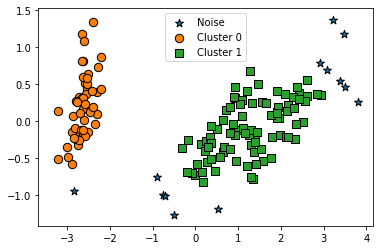

In [70]:
pca_transformed = pca.fit_transform(iris.data)

irisDF['ftr1'] = pca_transformed[:, 0]
irisDF['ftr2'] = pca_transformed[:, 1]

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: dbscan_cluster, dtype: int64


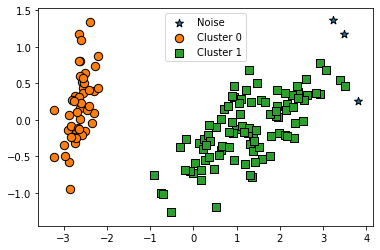

In [71]:
dbscan = DBSCAN(eps=0.8, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                48
        -1                 2
1        1                44
        -1                 6
2        1                36
        -1                14
Name: dbscan_cluster, dtype: int64


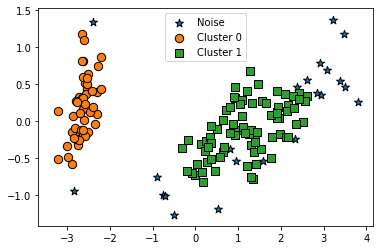

In [72]:
dbscan = DBSCAN(eps=0.6, min_samples=16, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
         2                 4
2        1                46
        -1                 4
Name: dbscan_cluster, dtype: int64


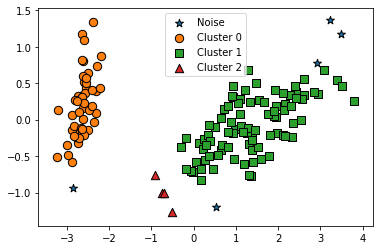

In [74]:
dbscan = DBSCAN(eps=0.6, min_samples=4, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)
irisDF['dbscan_cluster'] = dbscan_labels
irisDF['target'] = iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)
visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

In [75]:
# make circles